In [ ]:
# Core LangChain packages
!pip install langchain
!pip install openai
!pip install python-dotenv




In [ ]:
!pip install langchain-core langchain



In [ ]:
!pip install pandas matplotlib seaborn


In [ ]:
from langchain_core.language_models import LLM
from langchain_core.prompts import PromptTemplate
from typing import Optional, List


# Step 1: Define a Custom Dummy LLM

class DummyLLM(LLM):
    def _call(self, prompt: str, stop: Optional[List[str]] = None) -> str:
        topic = prompt.split(":")[-1].strip()
        return (
            f"• {topic} is an important concept in Natural Language Processing.\n"
            f"• It is widely studied in computer science and artificial intelligence.\n"
            f"• {topic} helps in understanding modern language-based technologies.\n"
            f"• It has several practical real-world applications."
        )

    @property
    def _llm_type(self) -> str:
        return "dummy-llm"


# Step 2: Create a Prompt Template

prompt = PromptTemplate(
    input_variables=["topic"],
    template="Generate short study notes in bullet points on the topic: {topic}"
)


# Step 3: Initialize Dummy LLM

llm = DummyLLM()


# Step 4: Create LangChain Pipeline

chain = prompt | llm


# Step 5: Take User Input

topic = input("Enter a topic: ")

# Step 6: Run the Chain

result = chain.invoke({"topic": topic})

print("\nGenerated Study Notes:\n")
print(result)


Enter a topic: text analysis

Generated Study Notes:

• text analysis is an important concept in Natural Language Processing.
• It is widely studied in computer science and artificial intelligence.
• text analysis helps in understanding modern language-based technologies.
• It has several practical real-world applications.


In [ ]:
import pandas as pd

# Direct public link to Iris dataset (from Kaggle source)
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"

df = pd.read_csv(url)

# Display first 5 rows
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df['species'].value_counts()


,count
species,
setosa,50
versicolor,50
virginica,50


In [ ]:
df.isnull().sum()


,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


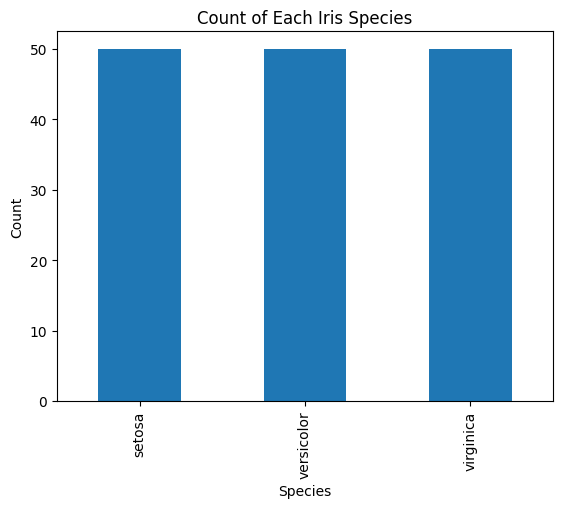

In [ ]:
import matplotlib.pyplot as plt

df['species'].value_counts().plot(kind='bar')
plt.title("Count of Each Iris Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

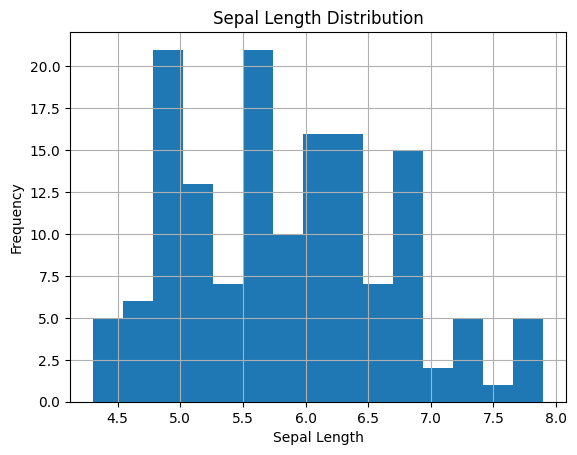

In [ ]:
df['sepal_length'].hist(bins=15)
plt.title("Sepal Length Distribution")
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.show()


In [ ]:
!pip install fastai transformers sentence-transformers torch


In [ ]:
from fastai.callback.progress import ProgressCallback


In [ ]:
from fastai.text.all import *
import pandas as pd


In [ ]:
data = {
    "text": [
        "I love this product",
        "This movie was amazing",
        "I hate this experience",
        "Worst service ever",
        "Very good performance",
        "Not satisfied at all"
    ],
    "label": [
        "positive",
        "positive",
        "negative",
        "negative",
        "positive",
        "negative"
    ]
}

df = pd.DataFrame(data)
df


,text,label
0,I love this product,positive
1,This movie was amazing,positive
2,I hate this experience,negative
3,Worst service ever,negative
4,Very good performance,positive
5,Not satisfied at all,negative


In [ ]:
dls = TextDataLoaders.from_df(
    df,
    text_col="text",
    label_col="label"
)


In [ ]:
from fastai.text.all import *

learn = text_classifier_learner(
    dls,
    AWD_LSTM,
    metrics=accuracy
)



In [ ]:
from fastai.callback.progress import ProgressCallback

learn.remove_cb(ProgressCallback)

In [ ]:
learn.no_bar()



In [ ]:
learn.fit(1)


[0, nan, 0.7002440690994263, 0.0, '00:00']


In [ ]:
learn.predict("The experience was bad")


('negative', tensor(0), tensor([0.5022, 0.4978]))

In [ ]:
!pip install -Uqq fastai duckduckgo_search


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 30.0 MB/s eta 0:00:00


In [ ]:
!pip install -Uqq fastai


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
from fastai.vision.all import *
from duckduckgo_search import DDGS

def search_images(term, max_images=30):
    print(f"Searching for '{term}'...")
    with DDGS() as ddgs:
        results = ddgs.images(keywords=term, max_results=max_images)
        return L([r['image'] for r in results])


In [ ]:
from fastai.vision.all import *

path = untar_data(URLs.PETS)
path



/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

<div><progress max="811706944" value="659292160"></progress> 81.22% [659292160/811706944 00:50&lt;00:11]</div>

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replac

In [ ]:
dls = ImageDataLoaders.from_name_re(
    path,
    get_image_files(path/"images"),
    pat=r'(.+)_\d+.jpg$',
    item_tfms=Resize(192),
    bs=32
)
